In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import jarque_bera

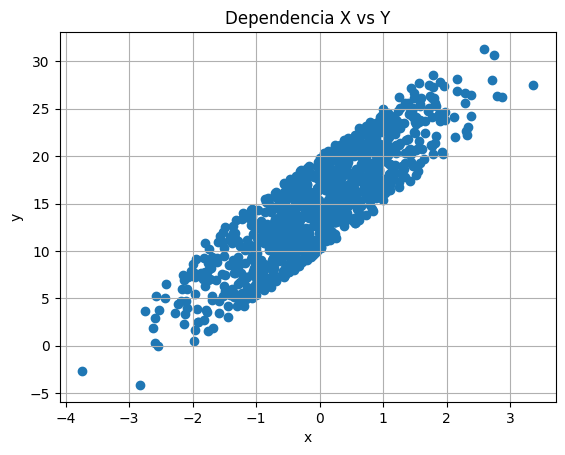

[[ 0.98254544  4.86268613]
 [ 4.86268613 32.35897228]]


In [45]:
# Covarianza con una x aleatoria y una Y con una función lineal y ruido
x = np.random.randn(1000, 1)
y = 5*x + 10 + 10*np.random.rand(1000, 1)

# Gráfico
plt.scatter(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dependencia X vs Y')
plt.grid(True)
plt.show()

# Cálculo de la covarianza
sky = np.cov(x.T, y.T)
print(sky)

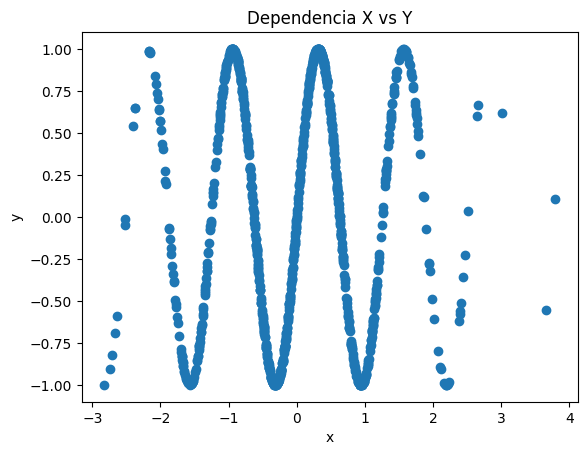

[[0.9925476  0.01730207]
 [0.01730207 0.49148207]]


In [4]:
# Covarianza con una x aleatoria y una Y con una función senoidal
x = np.random.randn(1000, 1)
y = np.sin(5*x)

# Gráfico
plt.scatter(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dependencia X vs Y')
plt.show()

# Cálculo de la covarianza
sky = np.cov(x.T, y.T)
print(sky)

In [9]:
# Leer los datos
data5 = pd.read_csv('dataE.txt', header=None)

In [10]:
data5.head()

,0
0,0.0200 -0.2800 -0.2300 0.5700 -0....
1,0.2900 1.0700 0.8100 0.6400 0....
2,0.2400 0.7200 0.2200 0.1700 0....
3,0.2700 0.0600 0.2300 -0.0400 -0....
4,0.6900 0.0500 0.1500 0.1200 0....


In [6]:
# Mismos datos con una columna de ruido
data6 = np.hstack((data5, np.random.randn(1165, 1)))

In [7]:
# Cálculo de la covarianza
s = np.cov(data6, rowvar=False)
s = np.round(s, 2)
print(s)

[[27.93 25.27 24.11 22.58 29.47  0.24]
 [25.27 30.4  24.68 22.62 31.48  0.19]
 [24.11 24.68 31.23 21.81 28.35  0.39]
 [22.58 22.62 21.81 30.51 26.03  0.19]
 [29.47 31.48 28.35 26.03 40.93  0.4 ]
 [ 0.24  0.19  0.39  0.19  0.4   0.98]]


In [8]:
# Cálculo de la correlación
k = np.corrcoef(data6, rowvar=False)
k = np.round(k, 4)
print(k)

[[1.     0.8674 0.8165 0.7734 0.8716 0.0461]
 [0.8674 1.     0.8011 0.7428 0.8925 0.0351]
 [0.8165 0.8011 1.     0.7064 0.7931 0.0701]
 [0.7734 0.7428 0.7064 1.     0.7365 0.0346]
 [0.8716 0.8925 0.7931 0.7365 1.     0.0629]
 [0.0461 0.0351 0.0701 0.0346 0.0629 1.    ]]


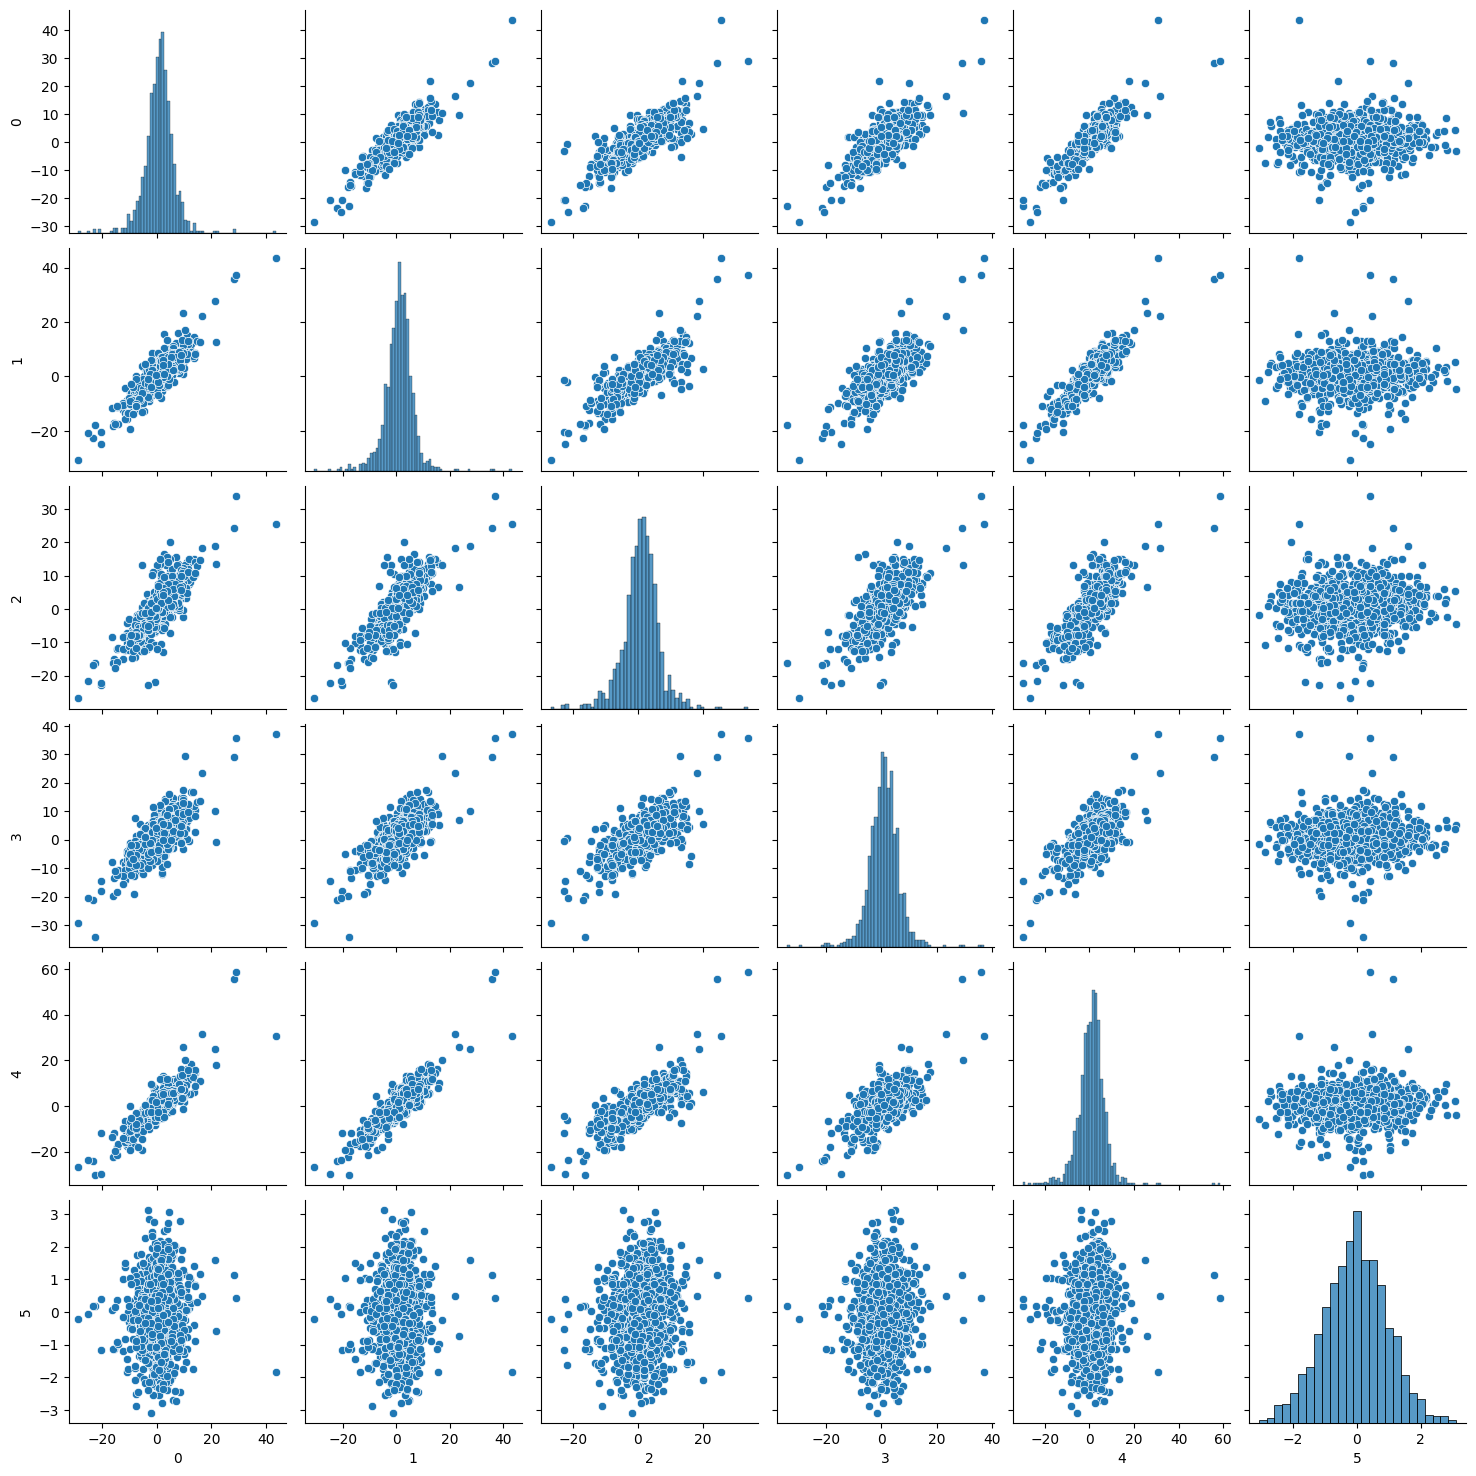

In [9]:
# Gráfico de la matriz de correlación
sns.pairplot(pd.DataFrame(data6))
plt.show()
# La columna #6 muestra una dependencia no lineal 
#comparada con la matriz original, ya que la covarianza es cero. 
# Y la varianza es el 1 al final de la matriz.

In [10]:
# DataFrame de covarianza
s = pd.DataFrame(s)
s

,0,1,2,3,4,5
0,27.93,25.27,24.11,22.58,29.47,0.24
1,25.27,30.40,24.68,22.62,31.48,0.19
2,24.11,24.68,31.23,21.81,28.35,0.39
3,22.58,22.62,21.81,30.51,26.03,0.19
4,29.47,31.48,28.35,26.03,40.93,0.40
5,0.24,0.19,0.39,0.19,0.40,0.98


In [11]:
# DataFrame de correlación
k = pd.DataFrame(k)
k

,0,1,2,3,4,5
0,1.0000,0.8674,0.8165,0.7734,0.8716,0.0461
1,0.8674,1.0000,0.8011,0.7428,0.8925,0.0351
2,0.8165,0.8011,1.0000,0.7064,0.7931,0.0701
3,0.7734,0.7428,0.7064,1.0000,0.7365,0.0346
4,0.8716,0.8925,0.7931,0.7365,1.0000,0.0629
5,0.0461,0.0351,0.0701,0.0346,0.0629,1.0000


In [12]:
# Coinstruir un modelo que explique x3 en los terminos de los otros 4 activos

# Variable dependiente
y = data5.iloc[:, 2] # Se extrae la columna 3

# Variables independientes
x = data5.iloc[:, [0, 1, 3, 4]] # Se toman los 4 activos restantes 

# Ajuste del modelo
model = LinearRegression() # Se instancia el modelo de regresión lineal
model.fit(x, y) # Se ajusta el modelo usando la variable dependiente y las independientes x

# Coeficientes, intercepto y R^2 del modelo
print("Coeficientes:", model.coef_) # Que tan sensible es x3 a los otros 4 activos
print("Intercepto:", model.intercept_) # Valor esperado de x3 cuando los otros 4 activos son cero
print("R^2:", model.score(x, y)) # Porcentaje de variabilidad de x3 explicado por los otros 4 activos

Coeficientes: [0.38608104 0.25250661 0.11717777 0.14604223]
Intercepto: 0.09441512221786597
R^2: 0.712130723291754


In [13]:
# Ajuste del modelo de regresión lineal usando statsmodels
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      2   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     717.4
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          8.92e-312
Time:                        23:33:00   Log-Likelihood:                -2931.8
No. Observations:                1165   AIC:                             5874.
Df Residuals:                    1160   BIC:                             5899.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0944      0.090      1.048      0.2

(array([  2.,   1.,   6.,  28., 242., 720., 143.,  14.,   5.,   4.]),
 array([-20.65019518, -16.81378318, -12.97737118,  -9.14095917,
         -5.30454717,  -1.46813517,   2.36827683,   6.20468884,
         10.04110084,  13.87751284,  17.71392484]),
 <BarContainer object of 10 artists>)

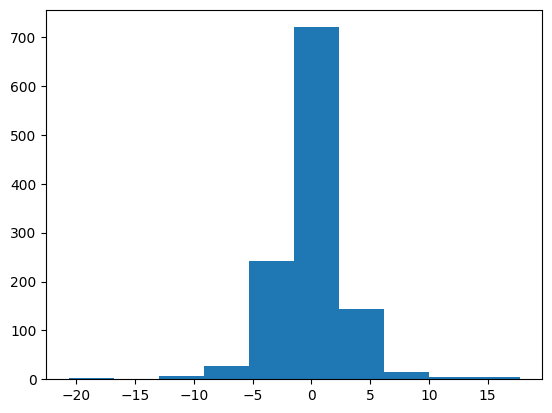

In [14]:
# Histograma de los residuos
res = model.resid
plt.hist(res)

In [15]:
# Media de los residuos
res.mean()

-5.306198970912336e-16

In [16]:
# SCT = SCM + SCR
SCT = np.sum((y - y.mean())**2)
SCM = np.sum((model.predict(x) - y.mean())**2)
SCR = np.sum(model.resid**2)

print("SCT:", SCT) # Suma de los cuadrados totales (SCT)
print("SCM:", SCM) # Suma de los cuadrados del modelo (SCM)
print("SCR:", SCR) # Suma de los cuadrados d los residuos (SCR)
print("SCM + SCR:", SCM + SCR)

# R^2 = SCM / SCT
print("R^2:", SCM / SCT)

# R^2 + SCT = 1
print("R^2 + SCT:", (SCM + SCR) / SCT)

# Porcentaje de R^2 y Residuales
print("Porcentaje de R^2:", (SCM / SCT)*100, "%" )
print("Porcentaje de Residuales:", (SCR / SCT)*100, "%" )

SCT: 36348.26740995709
SCM: 25884.717961054866
SCR: 10463.54944890226
SCM + SCR: 36348.26740995713
R^2: 0.712130723291755
R^2 + SCT: 1.000000000000001
Porcentaje de R^2: 71.2130723291755 %
Porcentaje de Residuales: 28.786927670824607 %


In [17]:
# Indicador para ver que variable x se explica mejor en terminos de las otras

# Paso 1: Construir la matriz de covarianza (KxK): c = cov(data)
# Paso 2: Diagonal de la matriz de covarianza: d = diag(c)
# Paso 3: Inversa de c: ci = inv(c)
# Paso 4: Diagonal de ci (de la inversa): di = diag(ci)
# Paso 5: Indicador (Porcentaje explicado por las otras de ella): r = 1-1./(d.*di) 

# c = np.cov(data5, rowvar=False)
c = np.cov(np.random.randn(1000, 5), rowvar=False)
d = np.diag(c)
ci = np.linalg.inv(c)
di = np.diag(ci)
r = 1-1./(d*di)

print("Indicador:", r)

Indicador: [0.00255223 0.00066757 0.00087634 0.00105066 0.00364982]


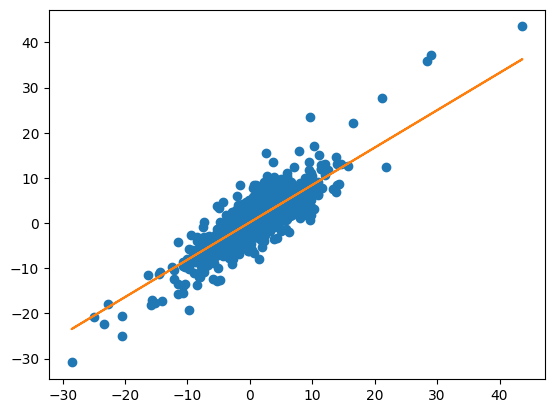

In [43]:
# Inicialización
k = 1
x = data5.iloc[:, [0]]  # Selecciona la primera columna de data5 como x
y = data5.iloc[:, 1]   # Selecciona la segunda columna de data5 como y
plt.plot(x, y, 'o')  # Grafica los puntos (x, y)
plt.plot(x, model.predict(sm.add_constant(x)))  # Grafica la recta de regresión
R2 = 0
R2V = []

while R2 < 0.95:
    x1 = sm.add_constant(x)  # Agrega una columna de unos a x
    model = sm.OLS(y, x1).fit()  # Ajusta el modelo de regresión lineal
    beta = model.params  # Coeficientes de regresión estimados

    yhat = x1.dot(beta)  # Calcula yhat

    r = y - yhat  # Calcula los residuos
    rra = np.abs(r)
    M = np.max(rra)
    i = np.where(rra == M)  # Encuentra el índice del valor absoluto máximo

    x = np.delete(x, i, axis=0)  # Elimina la fila correspondiente en x
    y = np.delete(y, i)  # Elimina el valor correspondiente en y

    R2 = model.rsquared_adj  # Calcula el R cuadrado ajustado
    R2V.append(R2)  # Almacena el R cuadrado ajustado en un arreglo
    k += 1


In [44]:
# Ajuste del modelo de regresión lineal usando statsmodels 
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 1.159e+04
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:57:36   Log-Likelihood:                -758.13
No. Observations:                 609   AIC:                             1520.
Df Residuals:                     607   BIC:                             1529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1739      0.035      5.000      0.0

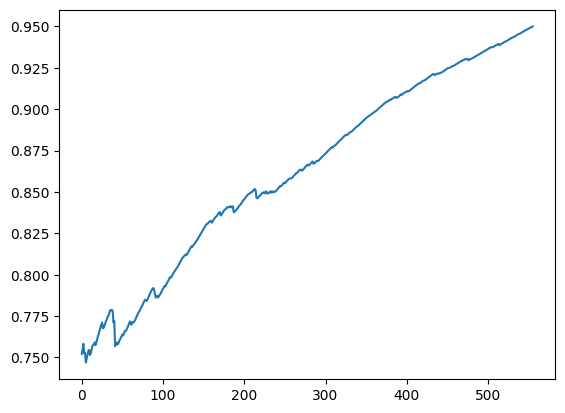

In [20]:
plt.plot(R2V)  # Grafica la evolución del R cuadrado ajustado
plt.show()

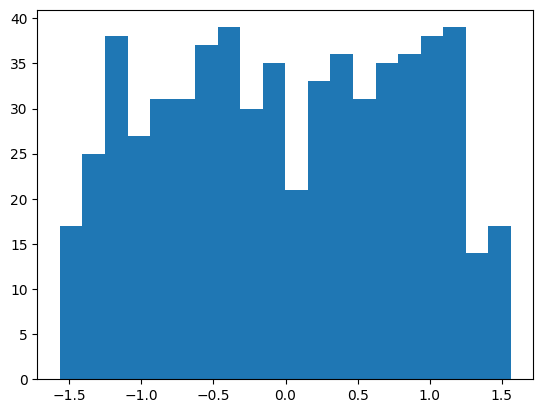

In [21]:
# Histograma de los residuos
plt.hist(r, bins=20)
plt.show()

In [22]:
# Prueba de Jarque-Bera para la normalidad de los residuos
h, p = jarque_bera(r)
if p < 0.05:
    print("Los residuos no siguen una distribución normal y sigue un modelo lineal.")
else:
    print("Los residuos siguen una distribución normal y no sigue un modelo lineal.")


Los residuos no siguen una distribución normal y sigue un modelo lineal.
